In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unidecode
import re

# Load Podcast Data

In [2]:
podcasts_df = pd.read_pickle('../pickle_files/english_podcasts_detailed_cleaned.pkl')

In [3]:
podcasts_df

,title,producer,genre,description,num_episodes,rating,num_reviews,link,episode_titles,episode_descriptions
0,History Hyenas with Chris Distefano and Yannis...,RiotCast Network,Comedy,Comedians Yannis Pappas and Chris Distefano go...,98.0,4.9,1300.0,https://podcasts.apple.com/us/podcast/history-...,robert moses was wild kinsey was wild prohibit...,the boys discuss robert moses wild the hyenas ...
1,Curiosity Daily,Westwood One,Education,The award-winning Curiosity Daily podcast from...,300.0,4.8,428.0,https://podcasts.apple.com/us/podcast/curiosit...,maps as weapons and art w justin fornal and em...,explorers justin fornal and emiliano ruprah fr...
2,Spirits,Multitude,History,"A boozy weekly podcast about mythology, legend...",161.0,4.8,1200.0,https://podcasts.apple.com/us/podcast/spirits/...,jacheongbi multimedia mythmaking with carmen m...,this story seems like we lifted it straight ou...
3,The Soundtrack Show,iHeartRadio,TV & Film,The Soundtrack Show is a weekly look at film s...,67.0,4.9,879.0,https://podcasts.apple.com/us/podcast/the-soun...,season intermission the nightmare before chri...,season intermission learn more about your ad...
4,Writing Excuses,"Brandon Sanderson, Mary Robinette Kowal, Dan W...",Arts,"Brandon Sanderson, Mary Robinette Kowal, Howar...",58.0,4.7,775.0,https://podcasts.apple.com/us/podcast/writing-...,economics realism vs ruleofcool sequencing you...,your hosts brandon dan howard and mahtab econ...
5,Steve McNair: Fall of a Titan,Sports Illustrated,True Crime,"July 4, 2009. Former NFL quarterback Steve McN...",10.0,4.3,1500.0,https://podcasts.apple.com/us/podcast/steve-mc...,epilogue the homicidecold case unit the widow ...,vincent hill presents evidence before a nashvi...
6,The Science Hour,BBC,Science,Science news and highlights of the week,13.0,4.5,110.0,https://podcasts.apple.com/us/podcast/the-scie...,climate in crisis wildfires and winds in calif...,pledges to reduce greenhouse gas emissions are...
7,The 5 AM Miracle with Jeff Sanders,Jeff Sanders,Education,Every Monday morning Jeff Sanders is here to h...,300.0,4.8,587.0,https://podcasts.apple.com/us/podcast/the-5-am...,the strategy to defy fear and define your des...,episode show notes jeffsanderscom learn more ...
8,Race Chaser with Alaska & Willam,Forever Dog,TV & Film,A podcast devoted to the discussion and dissec...,110.0,4.9,4600.0,https://podcasts.apple.com/us/podcast/race-cha...,hot goss slanderous libel tips from glsen and...,alaska and willam dive deep into gossip conjec...
9,Amy Should Be Forty,VAULT Studios,True Crime,"In October 1989, a 10-year old girl went missi...",6.0,4.6,228.0,https://podcasts.apple.com/us/podcast/amy-shou...,loose ends siblings besties the lineup amy goe...,what will it really take to solve the case of ...


In [4]:
total_number_podcast = len(podcasts_df.index)
print('Total Number of Podcasts: ' + str(total_number_podcast))

Total Number of Podcasts: 4303


# Exploratory Data Analysis

The DataFrame above was constructed by scraping all podcasts listed as "Popular Podcasts" from each major genre on iTunes. The DataFrame contains 4303 podcasts (after dropping podcasts that had 'NA' values). Here's a breakdown of each genre:

In [5]:
podcasts_df['genre'].value_counts()

Sports                     237
Arts                       235
Kids & Family              235
News                       233
True Crime                 232
Comedy                     229
Fiction                    227
Religion & Spirituality    227
Society & Culture          226
Science                    225
Health & Fitness           224
TV & Film                  224
Leisure                    224
History                    224
Technology                 223
Business                   223
Music                      222
Government                 220
Education                  213
Name: genre, dtype: int64

Text(0.5, 1.05, "Fig. 1: Number of 'Popular Podcasts' Per Genre")

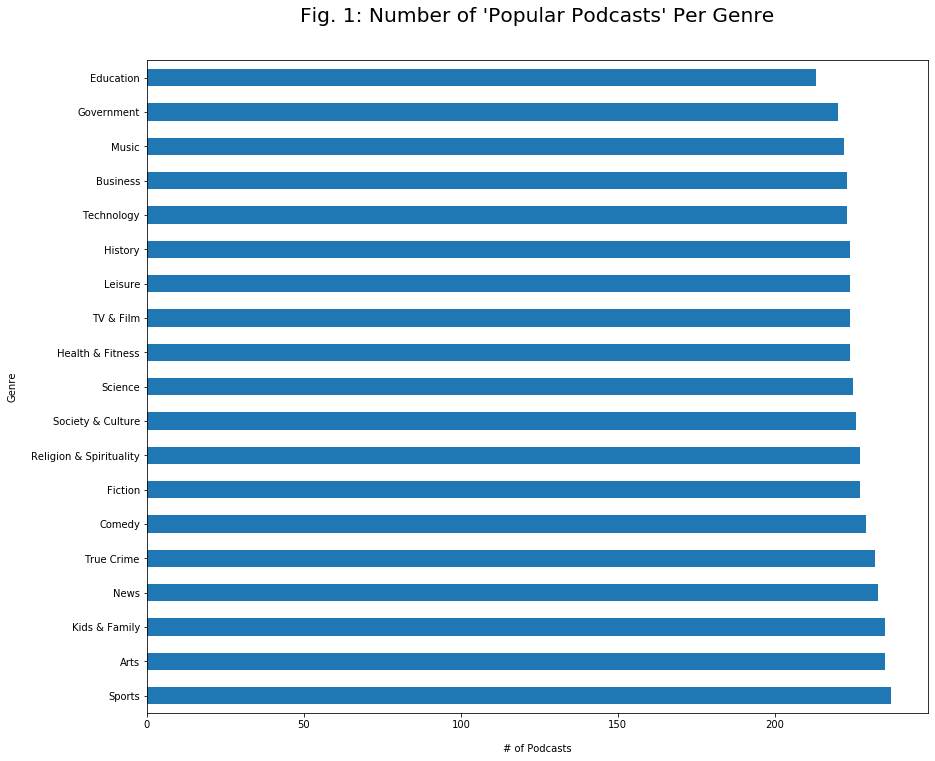

In [6]:
podcasts_df['genre'].value_counts().plot(kind='barh', figsize=(14, 12))
plt.xlabel("# of Podcasts", labelpad=14)
plt.ylabel("Genre", labelpad=14)
plt.style.use('fivethirtyeight')
plt.title("Fig. 1: Number of 'Popular Podcasts' Per Genre", y=1.05)

From the graph above, we can tell that Apple lists roughly the same number (~235) of "Popular Podcasts" per genre. So, for a given individual who has a favorite podcast in a particular genre, it becomes very difficult for that individual to search for similar, enjoyable podcasts. A user is faced with the burden of navigating through a large volume of podcasts not only within a specfic genre but across genres as well just to find something that they might like.

In [7]:
genre = podcasts_df[['genre', 'rating', 'num_reviews']]
genre.groupby('genre').mean()

,rating,num_reviews
genre,,
Arts,4.627234,1247.480851
Business,4.659641,1531.919283
Comedy,4.765939,6568.397380
Education,4.648357,774.361502
Fiction,4.648899,1085.176211
Government,4.658636,196.709091
Health & Fitness,4.696875,1269.455357
History,4.653125,1474.571429
Kids & Family,4.637872,614.302128


The above table shows the the average rating (out of 5) among all "Popular Podcasts" on iTunes per genre. The range of the average ratings is roughly 0.23, which is too small to say anything about a dominating, popular category. Also, it makes sense for iTunes to only display podcasts with high ratings on their "Popular Podcasts" page. 

So, it doesn't make logical sense to recommend a podcast genre to a user solely based on ratings because all the ratings are relatively high. Also, just recommending a podcast genre, once again, isn't helpful to a user becasue not only will the user already know what genre(s) he likes, but also needs to navigate roughly 235 popular podcasts in any given genre to find a favorite.

Text(0.5, 1.05, 'Fig. 2: Avg # of Reviews of Per Genre')

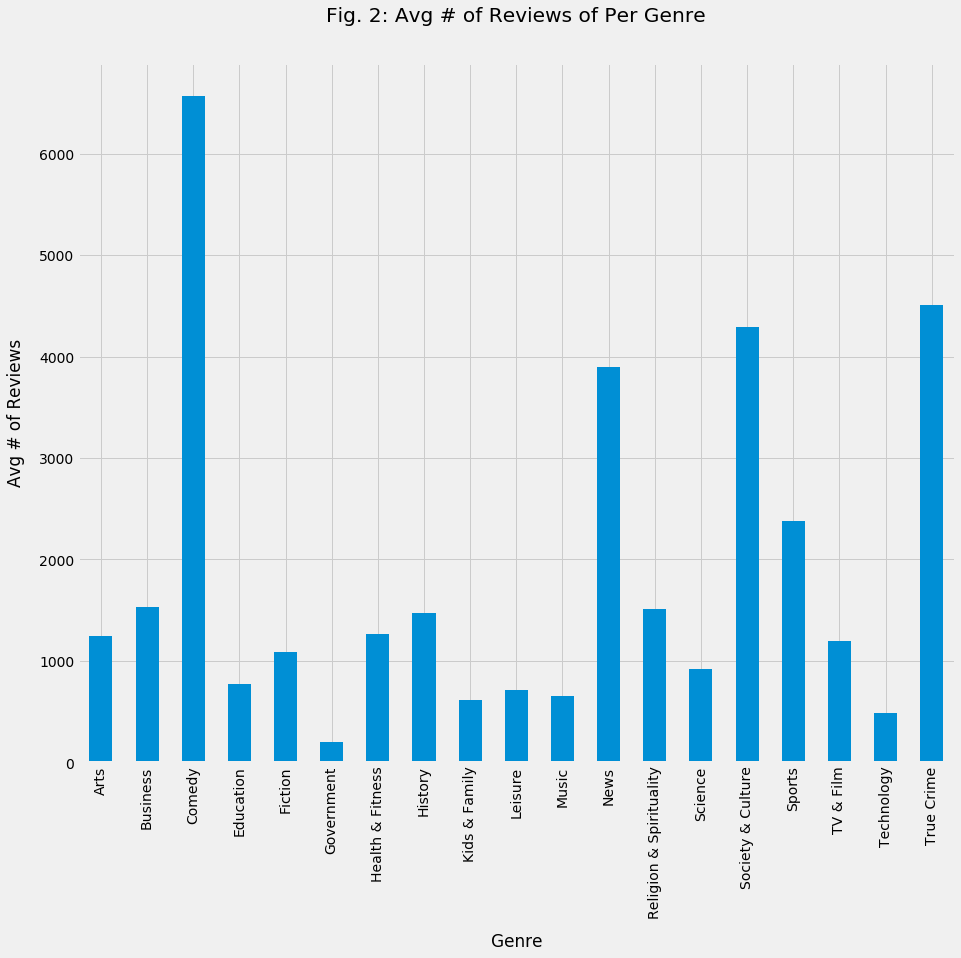

In [8]:
genre.groupby('genre')['num_reviews'].mean().plot(kind='bar', figsize=(14, 12))
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Avg # of Reviews", labelpad=14)
plt.style.use('fivethirtyeight')
plt.title("Fig. 2: Avg # of Reviews of Per Genre", y=1.05)

Text(0.5, 1.0, 'Fig. 3: Median of Reviews of Per Genre')

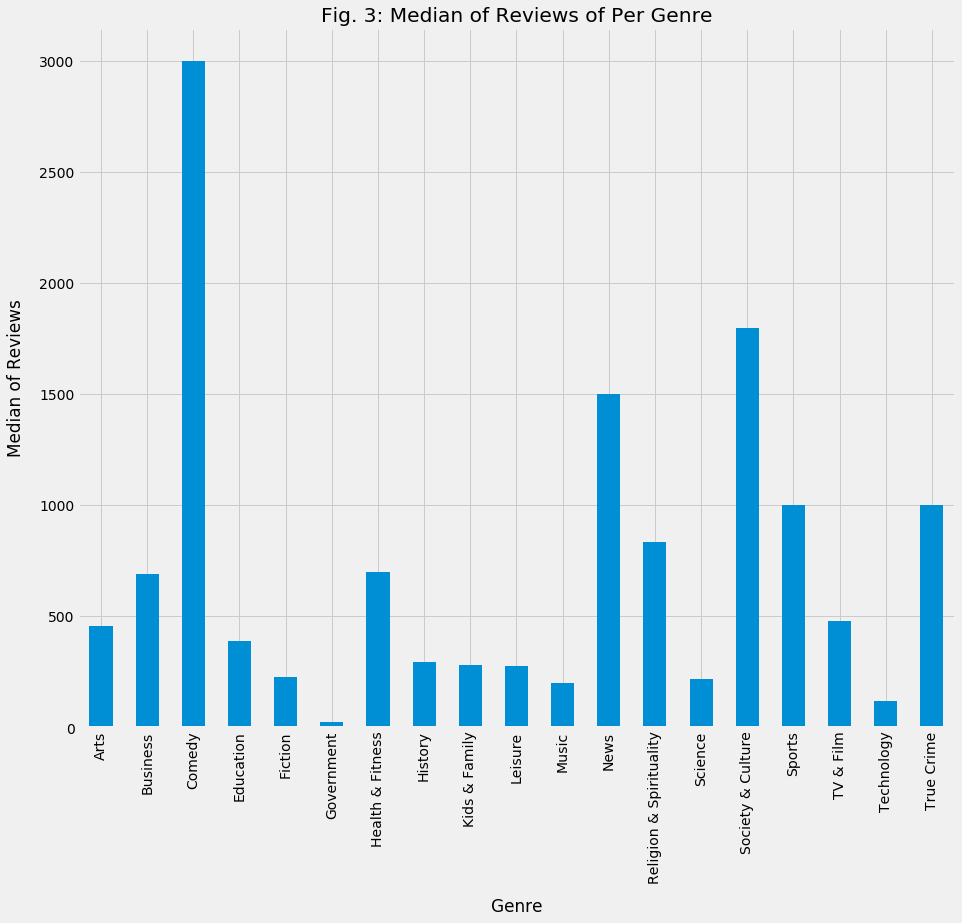

In [9]:
genre.groupby('genre')['num_reviews'].median().plot(kind='bar', figsize=(14, 12))
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Median of Reviews", labelpad=14)
plt.style.use('fivethirtyeight')
plt.title("Fig. 3: Median of Reviews of Per Genre", y=1.0)

Both Fig. 2 and Fig. 3 show us the average number of reviews and median number of reviews per genre, respectively. Intuitively, it would make sense that using the average number of reviews is a skewed summary statistic because of dominating podcasts in any given genre (i.e. The Joe Rogan Experience podcast has 127,500 reviews). Therefore, it makes more sense to observe Fig. 3, which shows the the median number of reviews per genre.

Looking at Fig. 3, we can see that the top 3 highly reviewed podcast genres are Comedy, Society & Culture, and News. I am making the assumption that any highly reviewed podcast genre is a genre that is popular, relevant, and active.

Although, Fig. 3 gives us insight as to what podcast genres are "buzzing," it doesn't help with the fact of of recommending podcasts to a user for some of the following reasons:

1. Say a user likes a specific "Comedy" podcast. He knows he likes the "Comedy" genre and wants to find a new "Comedy" podcast. The average rating doesn't really help because all the "Popular Podcasts" on iTunes is rated pretty high and too many reviews to read.

2. Say a user likes a specific "Government" podcast. The "Government" genre doesn't really have an active community with many people reviewing podcasts, so the user has no way of knowing what podcast to listen to next, and he is not willing to scour through the ~240 "Popular Podcasts" listed on the "Government" podcast page.

3. Say a user likes a specfic podcast in some genre. He wants to find a new podcast to listen to and he doesn't care about the genre. He just wants something that is similar to what he has been listening to. What can he do?

All of these are possible situations a user can run into. So, can we build a model to recommend a podcast to a user based on what he podcast he likes or what he listened to in the past?

# Understanding Genres

In [10]:
import sys
sys.path.insert(0, '../scripts')

import nltk
import heapq
from collections import Counter
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from get_podcast_ep_data import clean_description, clean_title

## Looking at Different Genres

In [11]:
def topKFrequent(tokenized_text, k): 
   
    count = Counter(tokenized_text)   
    
    return heapq.nlargest(k, count.keys(), key=count.get)

def get_genre_description_text(genre):
    genre_text = " ".join(clean_description(description) for description in podcasts_df[podcasts_df.genre==genre].description)
    
    tokenized_text = nltk.word_tokenize(genre_text)
    
    top20 = topKFrequent(tokenized_text, 20)
    updated_stopwords = set(nltk.corpus.stopwords.words('english'))
    updated_stopwords.update(common_words)
    updated_stopwords.update(top20)
    
    tokenized_text = [word for word in tokenized_text if word not in updated_stopwords]
    
    genre_text = ' '.join(tokenized_text)
    
    return genre_text

common_words = ['podcast', 'podcasts', 'every', 'new', 'weekly', 
                'stories', 'story', 'episode', 'episodes', 'listen', 
                'host', 'hosted', 'join', 'monday', 'tuesday', 'wednesday',
                'thursday', 'friday', 'saturday', 'sunday']

In [12]:
arts_text = get_genre_description_text('Arts')
kids_fam_text = get_genre_description_text('Kids & Family')
news_text = get_genre_description_text('News')
crime_text = get_genre_description_text('True Crime')
comedy_text = get_genre_description_text('Comedy')
religon_text = get_genre_description_text('Religion & Spirituality')
fiction_text = get_genre_description_text('Fiction')
culture_text = get_genre_description_text('Society & Culture')
science_text = get_genre_description_text('Science')
history_text = get_genre_description_text('History')
health_text = get_genre_description_text('Health & Fitness')
lesiure_text = get_genre_description_text('Leisure')
tv_film_text = get_genre_description_text('TV & Film')
tech_text = get_genre_description_text('Technology')
business_text = get_genre_description_text('Business')
music_text = get_genre_description_text('Music')
gov_text = get_genre_description_text('Government')
edu_text = get_genre_description_text('Education')

In [13]:
all_desc_text = arts_text + " " + kids_fam_text + " " + news_text + " " + crime_text + " " + comedy_text + " " + religon_text + " " + fiction_text + " " + culture_text + " " + science_text + " " + history_text + " " + health_text + " " + lesiure_text + " " + tv_film_text + " " + tech_text + " " + business_text + " " + music_text + " " + gov_text + " " + edu_text

In [14]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    plt.style.use('ggplot')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

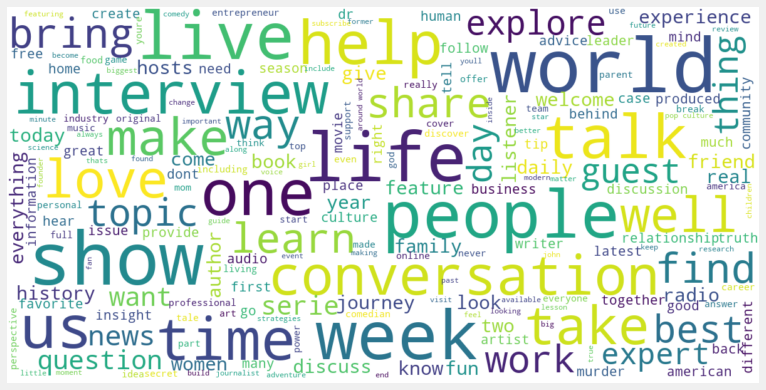

In [15]:
show_wordcloud(all_desc_text)

##### Fig. 1: Word Cloud of All Genres

The word cloud is an interesting visualization of the descriptions of all the "Popular Podcasts" across all the genres. The bigger words indicate what words are being used most frequently, universally across all podcast descriptions.

Now let's take a look at how the word cloud changes if we solely foucs on the "Comedy" genre

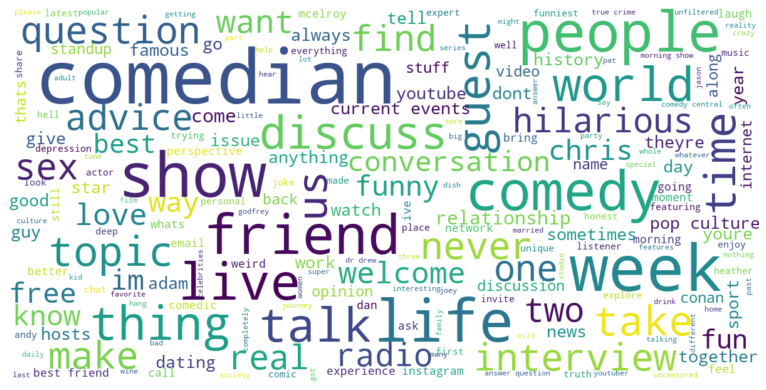

In [16]:
show_wordcloud(comedy_text)

##### Fig 2. Comedy Word Cloud

Looking at the "Comedy" genre word cloud, we can easily see some differences from the word cloud for all genres. Some common themes across the comedy genre include: "advice", "interview(s)", "relationship", "sex", and "conversation.". This tell us there are some common theme that are specific to certain genres. 

Let's look at one more genre: "News" just to see some interesting differences.

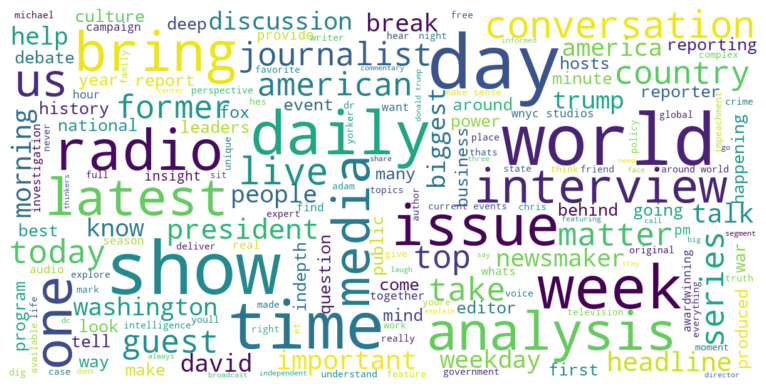

In [17]:
show_wordcloud(news_text)

##### Fig. 3 News Word Cloud

# Similarites Across Different Genres

From looking at some word clouds from different genres, we can see some of the popular words that circulate among certain genres. However, what if there are similarites across different genres, and how can we account for such similarites so that we can provide meaningful podcast recommendations across all genres to a user.

Hence, we need to investigate how genres are related and make sure that if a user likes a particular podcast within a specific genre that there not ignoring similar, likeable podcasts in different genres.

## Estimating Degree of Similarities between Genre Description Text

In [18]:
import gensim 
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.spatial import distance
from gensim.models import Word2Vec
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [19]:
def stemSentence(sentence):
    token_words = word_tokenize(sentence)
    stem_output = ' '.join([porter.stem(w) for w in token_words])
    
    return stem_output

def lemSentence(sentence):
    token_words = word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in token_words])
    
    return lemmatized_output

For the purposes of computational complexity and sake of simplicity, let's only look at the following 4 genres:
1. Comedy
2. News
3. Society & Culture (S&C)
4. Government

### Jaccard Similarity

In [20]:
def get_jaccard_sim(str1, str2):
    str1 = lemSentence(str1)
    str2 = lemSentence(str2)
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return round((float(len(c)) / (len(a) + len(b) - len(c))), 3)

In [21]:
print("Jaccard Similarity between Comedy and S&C = " + str(get_jaccard_sim(comedy_text, culture_text)))
print("Jaccard Similarity between Comedy and News = " + str(get_jaccard_sim(comedy_text, news_text)))
print("Jaccard Similarity between S&C and News = " + str(get_jaccard_sim(culture_text, news_text)))
print("Jaccard Similarity between Comedy and Government = " + str(get_jaccard_sim(comedy_text, gov_text)))
print("Jaccard Similarity between News and Government = " + str(get_jaccard_sim(news_text, gov_text)))
print("Jaccard Similarity between S&C and Government = " + str(get_jaccard_sim(culture_text, gov_text)))

Jaccard Similarity between Comedy and S&C = 0.221
Jaccard Similarity between Comedy and News = 0.201
Jaccard Similarity between S&C and News = 0.228
Jaccard Similarity between Comedy and Government = 0.195
Jaccard Similarity between News and Government = 0.243
Jaccard Similarity between S&C and Government = 0.236


### Cosine Similarity + CountVectorizer Method

In [22]:
def get_cosine_sim(str1, str2):
    
    str1 = lemSentence(str1)
    str2 = lemSentence(str2)
    
    # sentences to list
    allsentences = [str1 , str2]
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    cosine_sim = round((1-cosine), 3)
    
    return cosine_sim

In [23]:
print("Cosine Similarity between Comedy and S&C = " + str(get_cosine_sim(comedy_text, culture_text)))
print("Cosine Similarity between Comedy and News = " + str(get_cosine_sim(comedy_text, news_text)))
print("Cosine Similarity between S&C and News = " + str(get_cosine_sim(culture_text, news_text)))
print("Cosine Similarity between Comedy and Government = " + str(get_cosine_sim(comedy_text, gov_text)))
print("Cosine Similarity between News and Government = " + str(get_cosine_sim(news_text, gov_text)))
print("Cosine Similarity between S&C and Government = " + str(get_cosine_sim(culture_text, gov_text)))

Cosine Similarity between Comedy and S&C = 0.724
Cosine Similarity between Comedy and News = 0.575
Cosine Similarity between S&C and News = 0.662
Cosine Similarity between Comedy and Government = 0.494
Cosine Similarity between News and Government = 0.616
Cosine Similarity between S&C and Government = 0.593


### Cosine Similarity + TFIDF

In [24]:
def get_cosine_tfidf_sim(str1, str2):
    
    str1 = lemSentence(str1)
    str2 = lemSentence(str2)
    
    # sentences to list
    allsentences = [str1 , str2]
    
    # text to vector
    vectorizer = TfidfVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    cosine_sim = round((1-cosine), 3)
    
    return cosine_sim

In [25]:
print("Cosine Similarity + TFIDF between Comedy and S&C = " + str(get_cosine_tfidf_sim(comedy_text, culture_text)))
print("Cosine Similarity + TFIDF between Comedy and News = " + str(get_cosine_tfidf_sim(comedy_text, news_text)))
print("Cosine Similarity + TFIDF between S&C and News = " + str(get_cosine_tfidf_sim(culture_text, news_text)))
print("Cosine Similarity + TFIDF between Comedy and Government = " + str(get_cosine_tfidf_sim(comedy_text, gov_text)))
print("Cosine Similarity + TFIDF between News and Government = " + str(get_cosine_tfidf_sim(news_text, gov_text)))
print("Cosine Similarity + TFIDF between S&C and Government = " + str(get_cosine_tfidf_sim(culture_text, gov_text)))

Cosine Similarity + TFIDF between Comedy and S&C = 0.669
Cosine Similarity + TFIDF between Comedy and News = 0.502
Cosine Similarity + TFIDF between S&C and News = 0.599
Cosine Similarity + TFIDF between Comedy and Government = 0.393
Cosine Similarity + TFIDF between News and Government = 0.554
Cosine Similarity + TFIDF between S&C and Government = 0.539


### Cosine Similarity with GloVe Embedding

In [26]:
gloveFile = '../glove/glove.6b.100d.txt'

In [27]:
with open(gloveFile, encoding="utf8" ) as f:
    content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding

In [28]:
def cosine_sim_wordembedding_method(str1, str2):
    
    str1_wordList = list(set([w for w in str1.split()]))
    str2_wordList = list(set([w for w in str2.split()]))
    
    vector_1 = np.mean([model[word] for word in str1_wordList if word in model],axis=0)
    vector_2 = np.mean([model[word] for word in str2_wordList if word in model],axis=0)
    
    cosine = distance.cosine(vector_1, vector_2)
    cosine_sim = round((1-cosine), 3)
    
    return cosine_sim

In [29]:
print("Cosine Similarity w/GloVe embedding + SIF between Comedy and S&C = " + str(cosine_sim_wordembedding_method(comedy_text, culture_text)))
print("Cosine Similarity w/GloVe embedding + SIF between Comedy and News = " + str(cosine_sim_wordembedding_method(comedy_text, news_text)))
print("Cosine Similarity w/GloVe embedding + SIF between S&C and News = " + str(cosine_sim_wordembedding_method(culture_text, news_text)))
print("Cosine Similarity w/GloVe embedding + SIF between Comedy and Government = " + str(cosine_sim_wordembedding_method(comedy_text, gov_text)))
print("Cosine Similarity w/GloVe embedding + SIF between News and Government = " + str(cosine_sim_wordembedding_method(news_text, gov_text)))
print("Cosine Similarity w/GloVe embedding + SIF between S&C and Government = " + str(cosine_sim_wordembedding_method(culture_text, gov_text)))

Cosine Similarity w/GloVe embedding + SIF between Comedy and S&C = 0.988
Cosine Similarity w/GloVe embedding + SIF between Comedy and News = 0.974
Cosine Similarity w/GloVe embedding + SIF between S&C and News = 0.985
Cosine Similarity w/GloVe embedding + SIF between Comedy and Government = 0.941
Cosine Similarity w/GloVe embedding + SIF between News and Government = 0.98
Cosine Similarity w/GloVe embedding + SIF between S&C and Government = 0.966
